In [463]:
%load_ext autoreload
%autoreload 2

import os
import sys
    
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import scipy
import torch

from tqdm.auto import tqdm

DATA7_PATH = "/System/Volumes/Data/data/data7"
projects_path = f"{DATA7_PATH}/network_control/projects"
sys.path.insert(1, projects_path)
import CAP_tools

import torch_math_tools as tmt

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
The history saving thread hit an unexpected error (OperationalError('attempt to write a readonly database')).History will not be written to the database.


# Testing SparseCorrelator

In [464]:
n = 400
M = np.random.randn(3, n)
M.shape

(3, 400)

In [465]:
sparse_percent = 100
mask = np.zeros((n, n))
mask[:n // 2, n // 2:] = 1
mask[n // 2:, :n // 2] = 1
# mask[:n // 2:, :n // 2] = 1

exclude_index = (np.arange(n) > n // 3) | (np.arange(n) < n // 6)

# exclude_index = None
# mask = None
skip_diagonal = True
bs = 10
symmetric = False
sparseC = tmt.matrix.SparseCorrelator.run(M, sparsity_percent=sparse_percent,
                                          block_size=bs, mask=mask,
                                          exclude_index=exclude_index,
                                          symmetric=symmetric,
                                          skip_diagonal=skip_diagonal)

dc = sparseC.toarray()

SparseCorrelator Block Analysis:   0%|          | 0/0.16 [00:00<?, ?it/s]

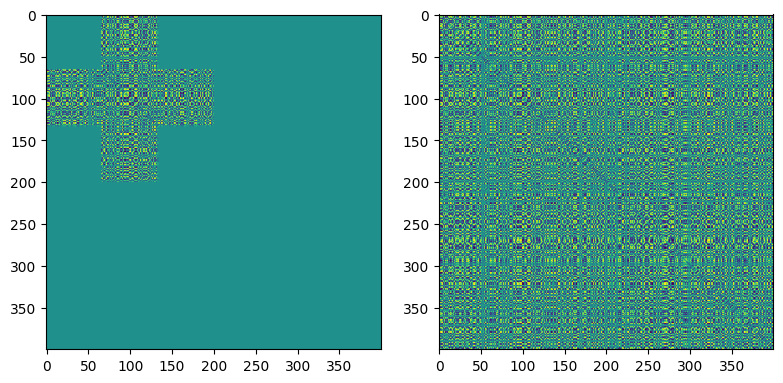

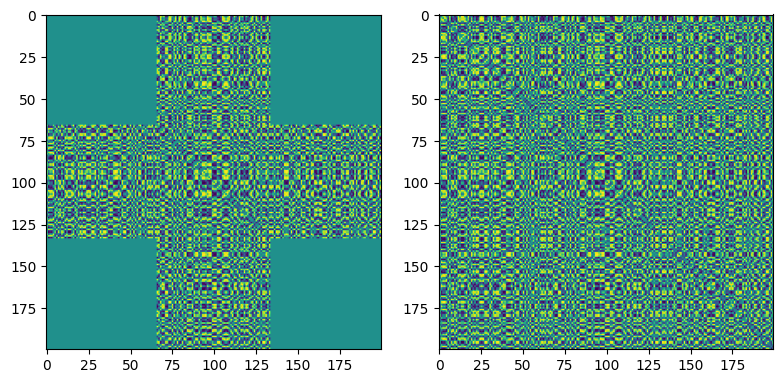

In [461]:
C_real = np.corrcoef(M.T.astype("float32"))
C_real[C_real <= np.percentile(C_real, 100 - sparse_percent)] = 0

if skip_diagonal:
    C_real[np.eye(C_real.shape[0], dtype=bool)] = 0
# assert np.isclose(sparseC.toarray(), C_real).mean() == 1

fig, (a0, a1) = plt.subplots(1, 2, figsize=(8, 4))
fig.tight_layout()
a0.imshow(dc)
a1.imshow(C_real)

fig, (a0, a1) = plt.subplots(1, 2, figsize=(8, 4))
fig.tight_layout()
a0.imshow(dc[:n//2, :n//2])
a1.imshow(C_real[:n//2, :n//2])

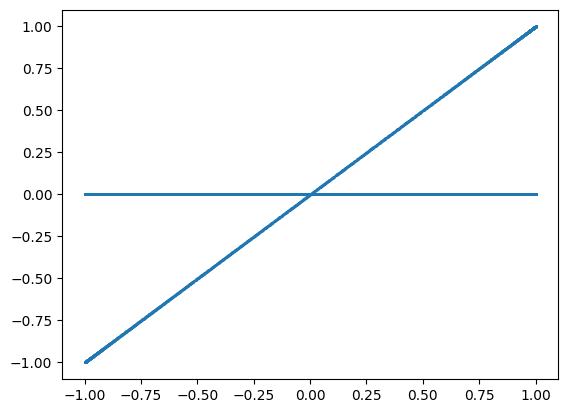

In [462]:
plt.scatter(C_real.ravel(), dc.ravel(), s=0.1, alpha=0.5)
# sns.kdeplot(x=C_real.ravel(), y=sparseC.toarray().ravel())

In [433]:
dc[:10, :10]

array([[ 9.9999988e-01, -7.1459562e-01, -7.3426217e-02, -2.3400788e-01,
         6.9978440e-01, -2.5491202e-01, -6.3094896e-01,  1.0054313e-01,
        -7.9721153e-01,  9.0354204e-01],
       [-7.1459562e-01,  0.0000000e+00,  7.5011963e-01,  8.4733593e-01,
        -3.4528866e-04, -4.9426904e-01,  9.9359190e-01, -7.6784068e-01,
         1.4737296e-01, -9.4541883e-01],
       [-7.3426217e-02,  7.5011963e-01,  1.0000002e+00,  9.8679280e-01,
         6.6104329e-01, -9.4563705e-01,  8.2005847e-01, -9.9962968e-01,
        -5.4353428e-01, -4.9368653e-01],
       [-2.3400788e-01,  8.4733593e-01,  9.8679280e-01,  1.0000000e+00,
         5.3076470e-01, -8.8046479e-01,  9.0193045e-01, -9.9083596e-01,
        -4.0038431e-01, -6.2803805e-01],
       [ 6.9978440e-01, -3.4528866e-04,  6.6104329e-01,  5.3076470e-01,
         9.9999988e-01, -8.6913830e-01,  1.1268494e-01, -6.4037561e-01,
        -9.8913181e-01,  3.2618439e-01],
       [-2.5491202e-01, -4.9426904e-01, -9.4563705e-01, -8.8046479e-01,
   

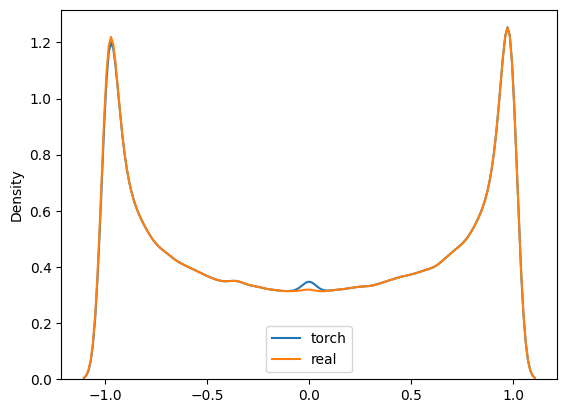

In [383]:
sns.kdeplot(dc.ravel(), bw_method=0.05, label="torch")
sns.kdeplot(C_real.ravel(), bw_method=0.05, label="real")
plt.legend()

In [352]:
z = tmt.np_corr(M.T, M.T)

In [197]:
mean = M.mean(axis=0)
std = M.std(axis=0)
normalized = (M - mean) / std
cm = normalized.T @ normalized / (M.shape[0] - 1)

In [339]:
x = M.T
y = M.T

x_m = x.mean(axis=1, keepdims=True)
y_m = y.mean(axis=1, keepdims=True)

x_norm = x - x_m
y_norm = y - y_m

x_s = np.sqrt(np.sum(x_norm ** 2, axis=1, keepdims=True))
y_s = np.sqrt(np.sum(y_norm ** 2, axis=1, keepdims=True))

In [345]:
x_demeaned = x - x.mean(axis=1, keepdims=True)
y_demeaned = y - y.mean(axis=1, keepdims=True)

x_norm = x_demeaned / np.sqrt(np.sum(x_demeaned ** 2, axis=1, keepdims=True))
y_norm = y_demeaned / np.sqrt(np.sum(y_demeaned ** 2, axis=1, keepdims=True))
C = x_norm @ y_norm.T

In [347]:
C[0]

array([ 1.        , -0.6214922 ,  0.57665191, -0.80299935,  0.66228952,
        0.10536564, -0.28698353,  0.99804859,  0.27608194, -0.92415684,
       -0.82560297,  0.98137178,  0.25045915,  0.99435492, -0.41907512,
        0.80859315,  0.97752537,  0.6426952 , -0.33794251,  0.95071762,
       -0.84874767, -0.37081627,  0.61677779, -0.76740883,  0.68003071,
       -0.49801704, -0.62509605,  0.63807653,  0.16758137, -0.77667974,
        0.86762158,  0.99587063, -0.26192876,  0.95872019, -0.02123865,
       -0.71590182, -0.99884839,  0.92174302,  0.34474966, -0.83810547,
        0.87992319, -0.39557425,  0.75369712,  0.3945776 ,  0.24284902,
        0.36334879, -0.06580012,  0.99562569, -0.41796321, -0.88577042,
        0.9567284 ,  0.34823104, -0.75486819,  0.1096907 ,  0.59171476,
       -0.32419661,  0.91112507, -0.47543259,  0.95100548,  0.85184409,
       -0.77853204,  0.28354995, -0.92260739,  0.97760095,  0.74073193,
        0.74049572, -0.9565639 ,  0.79804495,  0.94042962, -0.87

In [306]:
i, j = 0, 1

x[i] - x_m[i]

array([ 0.02344212, -1.06610474,  1.04266262])

In [307]:
x_norm[i], y_norm[j]

(array([ 0.02344212, -1.06610474,  1.04266262]),
 array([ 0.9254395 ,  0.19861179, -1.12405129]))

In [332]:
np.sum(x_norm[i] * y_norm[j]) / x_s[i] / y_s[j]
x_norm[i:i+1] @ y_norm[j:j+1].T / x_s[i] / y_s[j]

x_norm[i:i+1] @ y_norm[j:j+1].T
(x_norm @ y_norm.T)[i, j]

((x_norm / x_s ) @ (y_norm / y_s).T)[i, j]

np.float64(-0.6214921976342731)

In [333]:
scipy.stats.pearsonr(x[i], y[j])

PearsonRResult(statistic=np.float64(-0.6214921976342729), pvalue=np.float64(0.5730535031207659))

<Axes: ylabel='Density'>

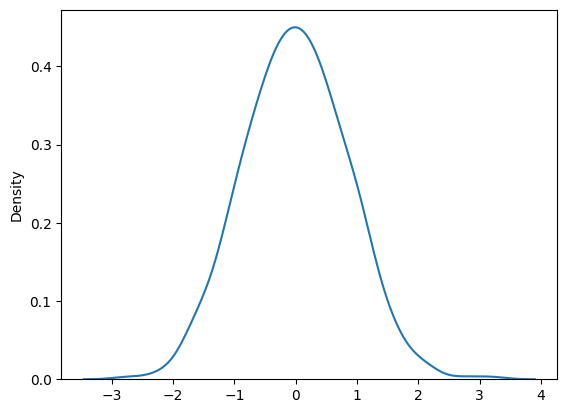

In [218]:
sns.kdeplot((y - y_m).ravel())

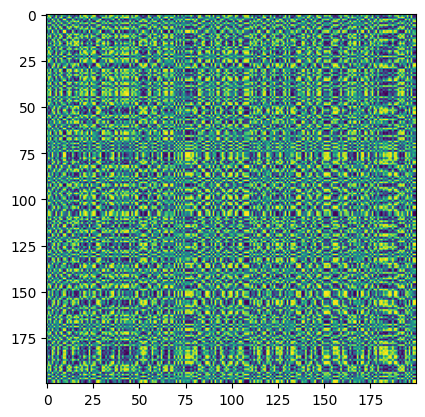

In [349]:
plt.imshow(cm)

In [358]:
np.isclose(z, C_real).mean()

np.float64(0.9984)

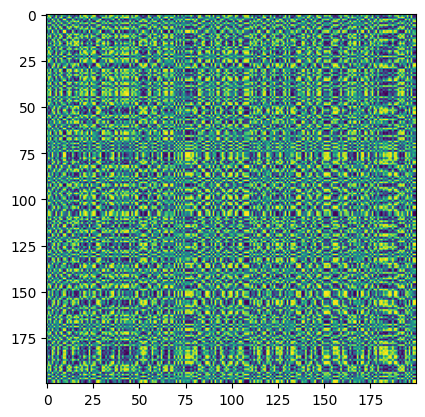

In [353]:
plt.imshow(z)

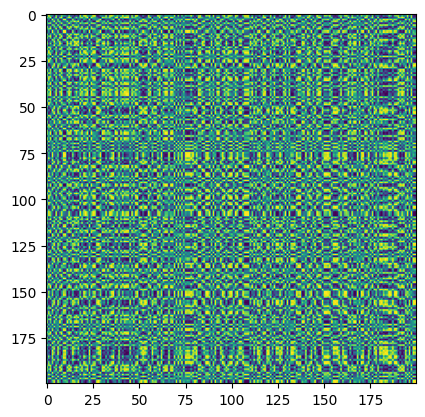

In [192]:
plt.imshow(C_real)

# Thresholded Correlator 

In [478]:
mask = np.zeros((n, n))
mask[:n // 2, n // 2:] = 1
mask[n // 2:, :n // 2] = 1
# mask[:n // 2:, :n // 2] = 1

exclude_index = (np.arange(n) > n // 3) | (np.arange(n) < n // 6)

exclude_index = None
mask = None
skip_diagonal = True
bs = 10
symmetric = False
threshold = 0.1

sparseC = tmt.matrix.ThresholdCorrelator.run(M, threshold=threshold,
                                          block_size=bs, mask=mask,
                                          exclude_index=exclude_index,
                                          symmetric=symmetric,
                                          skip_diagonal=skip_diagonal)

dc = sparseC.toarray()

ThresholdCorrelator Block Analysis:   0%|          | 0/0.16 [00:00<?, ?it/s]

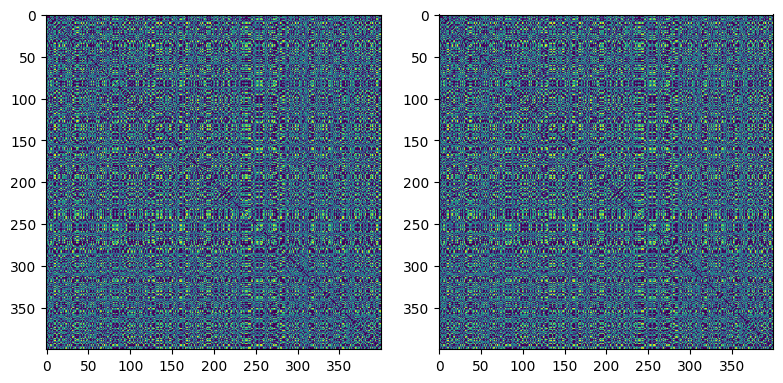

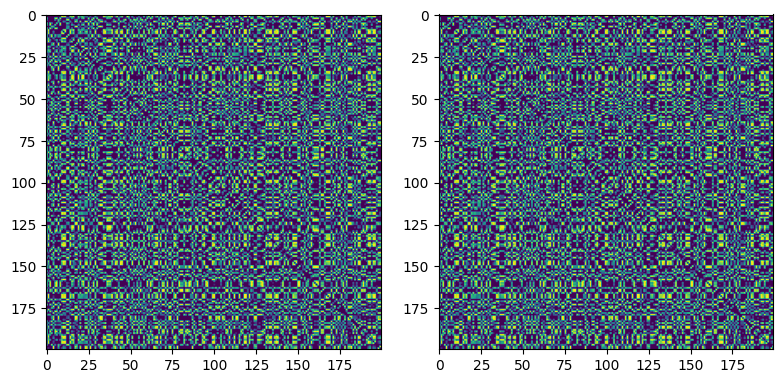

In [481]:
C_real = np.corrcoef(M.T.astype("float32"))
C_real[C_real <= threshold] = 0

if skip_diagonal:
    C_real[np.eye(C_real.shape[0], dtype=bool)] = 0
# assert np.isclose(sparseC.toarray(), C_real).mean() == 1

fig, (a0, a1) = plt.subplots(1, 2, figsize=(8, 4))
fig.tight_layout()
a0.imshow(dc)
a1.imshow(C_real)

fig, (a0, a1) = plt.subplots(1, 2, figsize=(8, 4))
fig.tight_layout()
a0.imshow(dc[:n//2, :n//2])
a1.imshow(C_real[:n//2, :n//2])